In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from PIL import Image

In [2]:
from utils import rgb2binary

In [3]:
map1 = Image.open('init_maps/map_1.jpg')

map1 = rgb2binary(np.array(map1))

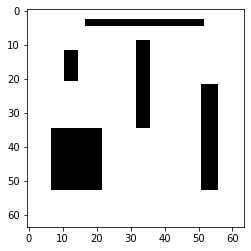

In [4]:
plt.imshow(map1, cmap='gray')

In [5]:
from utils import MapAugmentator, TaskGenerator

In [6]:
map_augmentator = MapAugmentator(map1)
map_augmentator.set_parameters(h_shift=4, w_shift=4, step=1, t_prob=0.5)

In [7]:
maps = map_augmentator.generate(n_maps=10)

In [8]:
from utils import make_grid

In [9]:
grid = make_grid(maps, n_maps=10, margin=2)

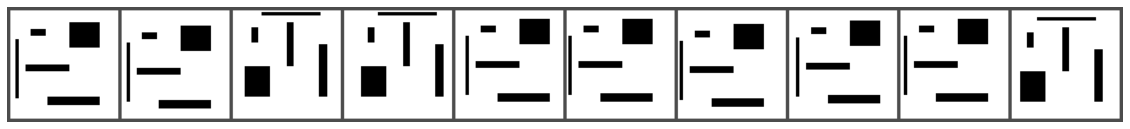

In [10]:
plt.figure(figsize=(20, 4))
plt.imshow(grid, cmap='gray')
plt.axis('off')
plt.show()

In [11]:
task_generator=TaskGenerator(map1)
task_generator.set_parameters(min_length=20)
tasks = task_generator.generate(n_tasks=10)
pd.DataFrame.from_dict(tasks)

,istart,jstart,igoal,jgoal,euclid
0,57,21,1,15,56.320511
1,63,61,0,25,72.560320
2,38,33,1,61,46.400431
3,51,62,22,63,29.017236
4,0,52,21,13,44.294469
5,17,29,53,35,36.496575
6,14,3,20,54,51.351728
7,27,7,35,37,31.048349
8,30,50,30,19,31.000000
9,15,1,57,12,43.416587


In [12]:
from utils import save_maps_and_tasks

In [13]:
fnames = ['map_'+str(i) for i in range(1, 6)]

h_shift=4
w_shift=4
step=1
t_prob=0.5

n_maps=10
n_tasks=50
min_length=20

0it [00:00, ?it/s]

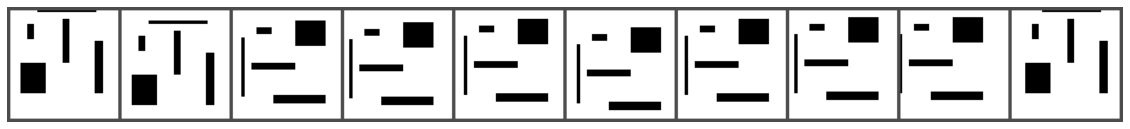

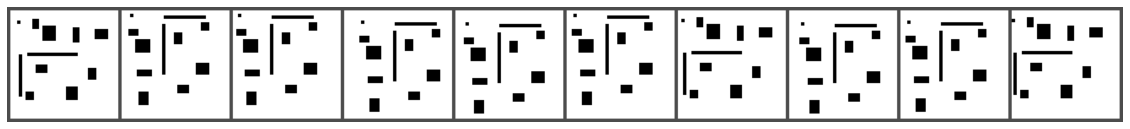

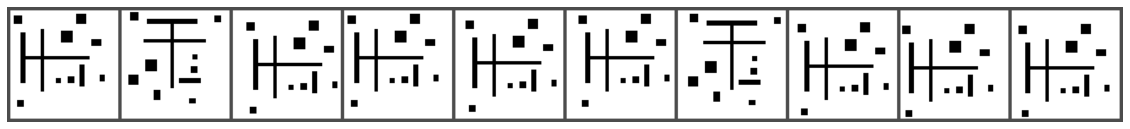

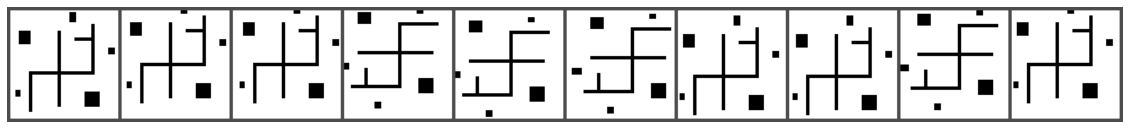

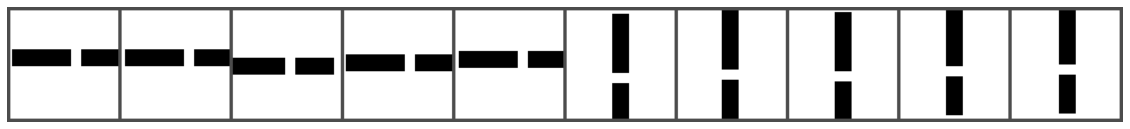

In [14]:
for i, fname in tqdm(enumerate(fnames)):
    init_map = Image.open(f'init_maps/{fname}.jpg')
    init_map = rgb2binary(np.array(init_map))
    
    map_augmentator = MapAugmentator(init_map)
    
    map_augmentator.set_parameters(h_shift=h_shift,
                                   w_shift=w_shift,
                                   step=step,
                                   t_prob=t_prob)
    
    maps = map_augmentator.generate(n_maps=n_maps)
    tasks=[]
    
    for m in maps:
        task_generator=TaskGenerator(m)
        task_generator.set_parameters(min_length=min_length)
        tasks.append(task_generator.generate(n_tasks=n_tasks))
        
    grid = make_grid(maps, n_maps=10, margin=2)
    plt.figure(figsize=(20, 4))
    plt.imshow(grid, cmap='gray')
    plt.axis('off')
    plt.show()
    save_maps_and_tasks(maps, tasks, m_path='maps/', t_path='tasks/',  istart=i*n_maps)